# Exercise: RDataFrame and collections

The same dataset used in the previous exercise (`TTree` "dataset" in file `../data/example_file.root`) contains two vector columns `vec1` and `vec2`.<br>
The elements of `vec1` are distributed as a mixture of Gaussians, plus background noise.<br>
To remove the background noise, select the elements of `vec1` for which the square of the corresponding elements in `vec2` is less than 0.1.

Where are the peaks of this mixture of Gaussians?

### Useful links

- [RDataFrame: working with collections](https://root.cern/doc/master/classROOT_1_1RDataFrame.html#collections)
- [RVec reference](https://root.cern/doc/master/classROOT_1_1VecOps_1_1RVec.html)

In [2]:
import ROOT

Welcome to JupyROOT 6.30/07


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      52.3377
NDf                       =           30
Edm                       =  2.37446e-06
NCalls                    =           61
Constant                  =      33.1519   +/-   1.77329     
Mean                      =     -2.01751   +/-   0.0476495   
Sigma                     =      1.04706   +/-   0.0350916    	 (limited)
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      39.7756
NDf                       =           27
Edm                       =  6.44334e-08
NCalls                    =           60
Constant                  =      63.0551   +/-   2.61147     
Mean                      =      3.01904   +/-   0.0333783   
Sigma                     =     0.959862   +/-   0.0259321    	 (limited)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


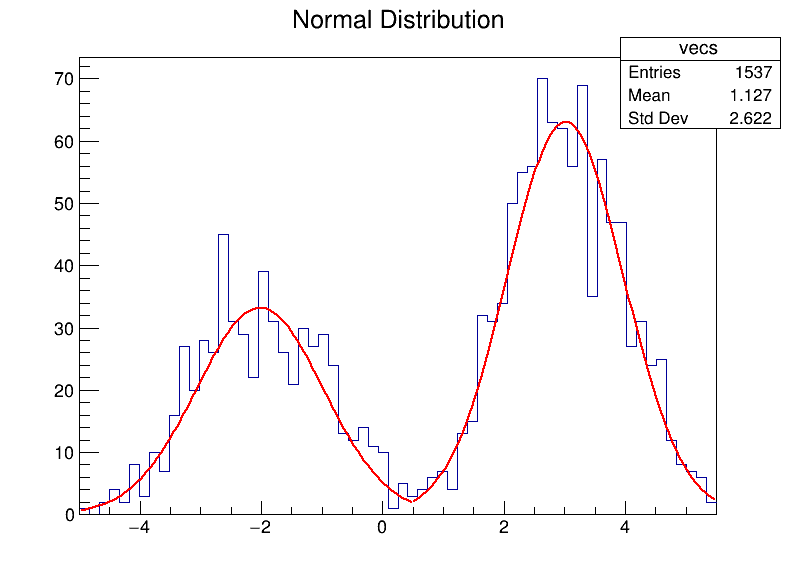

In [11]:
df = ROOT.RDataFrame("dataset", "example_file.root")

data = df.Define("vec3", "vec1[vec2*vec2 < .1]")

c= ROOT.TCanvas("c", "canvas", 800, 600)
h = data.Histo1D(("vecs", "Normal Distribution", 64, -5., 5.5),"vec3")

gaus1 = ROOT.TF1("Gaus1","gaus",-5, .5)
gaus2 = ROOT.TF1("Gaus2","gaus",.5, 5.5)

h.Fit(gaus1, "R")
h.Fit(gaus2, "R+")

h.Draw()

c.Draw()